# Symulator kolejki M/M/C
## Projekt
Statystyka i teoria obsługi masowej.

Informatyka, stopień II, semestr I.

Grupa projektowa:
- Artur Bednarczyk
- Krzysztof Janiec
- Filip Strózik

Projekt przygotowany w języku `Python`, dokumentacja utworzona w `Jupyter Lab`. W folderze `src` znajdują się pliki źródłowe, a w `example_results` przykładowe wynik, nie są to wyniki wykorzystane w tym dokumencie.

Całość, razem z plikiem `.ipynb` dostępna w repozytorium:

Repozytorium Github: [https://github.com/Isur/queue-simulator/](https://github.com/Isur/queue-simulator/)
## Teoria
### Notacja Kendala
Notacja zaproponowana przez Davida G. Kednalla w 1953 roku dotyczy opisów systemów kolejkowych. Wygląda ona w następujący sposób:

**A/B/c/L/N**, gdzie kolejne składowe oznaczają:
- A - rozkład zmiennej losowej określającej czas między kolejnymi zgłoszeniami
- B - rozkład zmiennej losowej określającej czas obsługi zgłoszenia
- c - liczba równoległych stanowisk obsługujących zgłoszenia
- L - bufor, rozmiar kolejki (domyślnie - nieskończona)
- N - wymiar źródła zgłoszeń (domyślnie - nieskończone) 

### M/M/C
Zgodnie z notacją Kendalla system kolejkowy M/M/C to system z czasem miedzy kolejnymi zgłoszeniami o rozkładzie wykładniczym, czasem obsługi zgłoszeń o rozkłądzie wykładniczym oraz `c` równoległych statowiskach obsługi. Kolejka nie jest ograniczona.
## Symulator
### Opis
Celem symulatora jest wykonanie dużej liczby symulacji kolejki. W tym celu została przygotowana klasa tworząca testy o losowych parametrach z wyznaczonego przedziału a następnie wykonująca symulacje wykorzystując wszystkie dostępne rdzenie procesora urządzenia na którym zostaje uruchomiona. W wyniku działania otrzymujemy plik o rozszerzeniu `.csv`, który zawiera wyniki z wszystkich symulacji. Kolejne kolumny to:
- Total Customers - liczba wszystkich zgłoszeń w systemie
- Serviced Customers - liczba obsłużonych zgłoszeń
- Not Serviced Customers - liczba nieobsłużonych zgłoszeń
- Service Mean Time - średni czas obsługi
- Service Rate - ustawione tempo obsługi
- Arrival Rate - ustawione tempo napływu zgłoszeń
- Servers Number - liczba stanowisk obsługi - serwerów
- Time Limit - limit czasowy
- Delay probability - obliczone prawdopodobieństwo opóźńienia
- System load - obliczone obciążenie systemu
- Average Customers - obliczona średnia liczba zgłoszeń w systemie
- Mean Service Time - obliczony średni czas obsługi
- Average Time In System - obliczony średni czas przebywania zgłoszenia w systemie

Wymienione kolumny to wyniki z symulacji komputerowej, ustawienia danej symulacji oraz wyniki z teoretycznego modelu dla danych ustawień.
Po za wynikiem ogólny zostaje również zapisane kilka całych procesów z symulacji. Wyniki takie zawierają ustawienia użyte w danej symulacji oraz cały przebieg procesu.
Wartości teoretyczne są obliczane tylko gdy dany process posiada stan stacjonarny. 
### Przykład użycia
Ten przykład zostanie wykorzystany do dalszej analizy. Zostanie wykonane 20 000 symulacji z losowymi ustawieniami.

In [1]:
from time import time
from main import Tester
tester = Tester(20000)
tester.prepare_tests()
start_time = time()
tester.run_multi_process()
end_time = time()
tester.print_results(end_time - start_time)

  0%|          | 0/20000 [00:00<?, ?it/s]

Number of tests: 20000
CPU Process number: 4
Number of tests processed by each process:
[5000, 5000, 5000, 5000]
Progress bar might by little jumpy cause of multiprocessing


  0%|          | 0/20000 [00:57<?, ?it/s], 471.80it/s]



Tested in 57.00768184661865s
Results saved to file '../results/results.csv'


Ustawienia są losowane dla każdego testu, tempo napływu z przedziału 4 - 10, tempo obsługi z przedziału 2 - 8 oraz liczba serwerów 2 - 6. Natomiast czas określony dla danego testu jest wzorem: `10 * (i % 10 + 1)`, gdzie `i` oznacza i-ty test.

Dla powyższego testu wyniki wyglądają następująco:

In [2]:
import pandas as pd

dataset = pd.read_csv("../results/result.csv", delimiter=";")
print("Kolumny:")
for col in dataset.columns:
    print(col, end=" | ")
print("\n\n")
print(dataset)

Kolumny:
Total Customers | Serviced Customers | Not Serviced Customers | Service Mean Time | Service Rate | Arrival Rate | Servers Number | Time Limit | Delay probability | System load | Average Customers | Mean Service Time | Average Time In System | 


       Total Customers  Serviced Customers  Not Serviced Customers  \
0                   40                  40                       0   
1                  156                 154                       2   
2                  132                 131                       1   
3                  273                 268                       5   
4                  329                 288                      41   
...                ...                 ...                     ...   
19995              572                 571                       1   
19996              700                 698                       2   
19997              588                 360                     228   
19998              366                 366   

In [3]:
process = pd.read_csv("../results/process-0.csv", delimiter=";")
print(process)

       Time    Event  Server id  Customer id  Customers in system
0    0.0000  ARRIVAL        NaN            0                    1
1    0.0000  SERVICE        2.0            0                    1
2    0.0015    LEAVE        2.0            0                    0
3    0.0222  ARRIVAL        NaN            1                    1
4    0.0222  SERVICE        0.0            1                    1
..      ...      ...        ...          ...                  ...
115  8.9289  SERVICE        2.0           38                    1
116  9.6074    LEAVE        2.0           38                    0
117  9.7694  ARRIVAL        NaN           39                    1
118  9.7694  SERVICE        1.0           39                    1
119  9.7774    LEAVE        1.0           39                    0

[120 rows x 5 columns]


In [4]:
with open("../results/process-0.txt", "r") as file:
    print(file.read())

Run with settings:
Service rate: 5.576792623500342
Arrival rate: 4.063776327920862
Number of servers: 3
Time limit: 10
  Time  Event      Server id    Customer id    Customers in system
------  -------  -----------  -------------  ---------------------
0       ARRIVAL                           0                      1
0       SERVICE            2              0                      1
0.0015  LEAVE              2              0                      0
0.0222  ARRIVAL                           1                      1
0.0222  SERVICE            0              1                      1
0.106   ARRIVAL                           2                      2
0.106   SERVICE            1              2                      2
0.2353  ARRIVAL                           3                      3
0.2353  SERVICE            2              3                      3
0.3443  LEAVE              0              1                      2
0.3979  LEAVE              1              2                      1
0.4552  LE

Przygotowany został również graficzny interpreter powyższych wyników. Plik `.csv` zawierający proces może zostać wykorzystany do wyświetlenia wykresu przedstawiającego cały proces oraz wykresu przedstawiającego liczbę zgłoszeń występującą w systemie oraz jak wiele razy taka liczba wystąpiła.

Run with settings:
Service rate: 5.576792623500342
Arrival rate: 4.063776327920862
Number of servers: 3
Time limit: 10



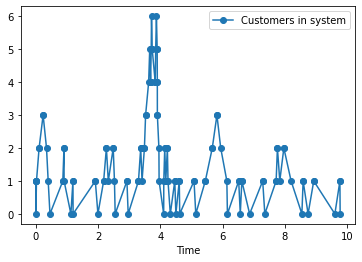

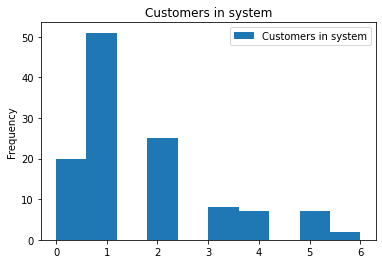

Run with settings:
Service rate: 2.2980757076616767
Arrival rate: 5.4356536596188985
Number of servers: 3
Time limit: 10



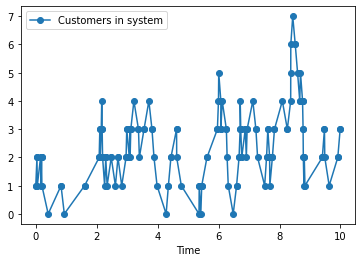

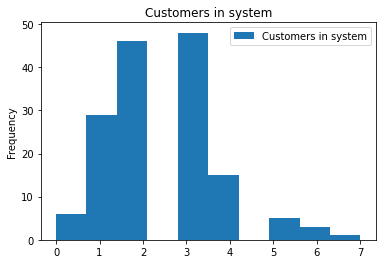

Run with settings:
Service rate: 6.318631458395456
Arrival rate: 9.51102947805536
Number of servers: 4
Time limit: 10



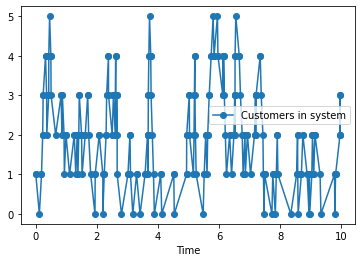

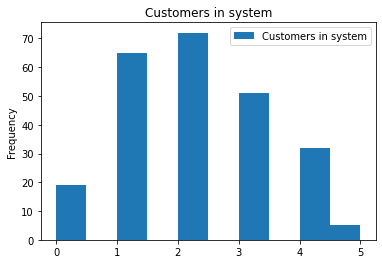

Run with settings:
Service rate: 3.58353755189278
Arrival rate: 7.366545718527214
Number of servers: 2
Time limit: 10



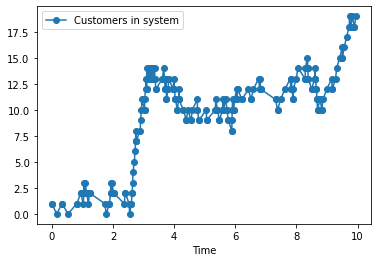

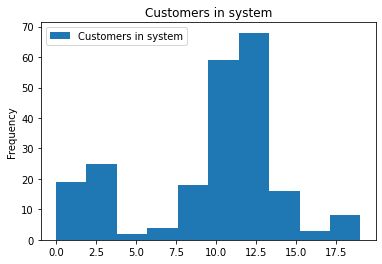

In [5]:
from resultAnalysis import Results
from matplotlib import pyplot as plt
import os

for i in range(os.cpu_count()): 
    Results().plot_process_from_file(f'../results/process-{i}')
    plt.show()

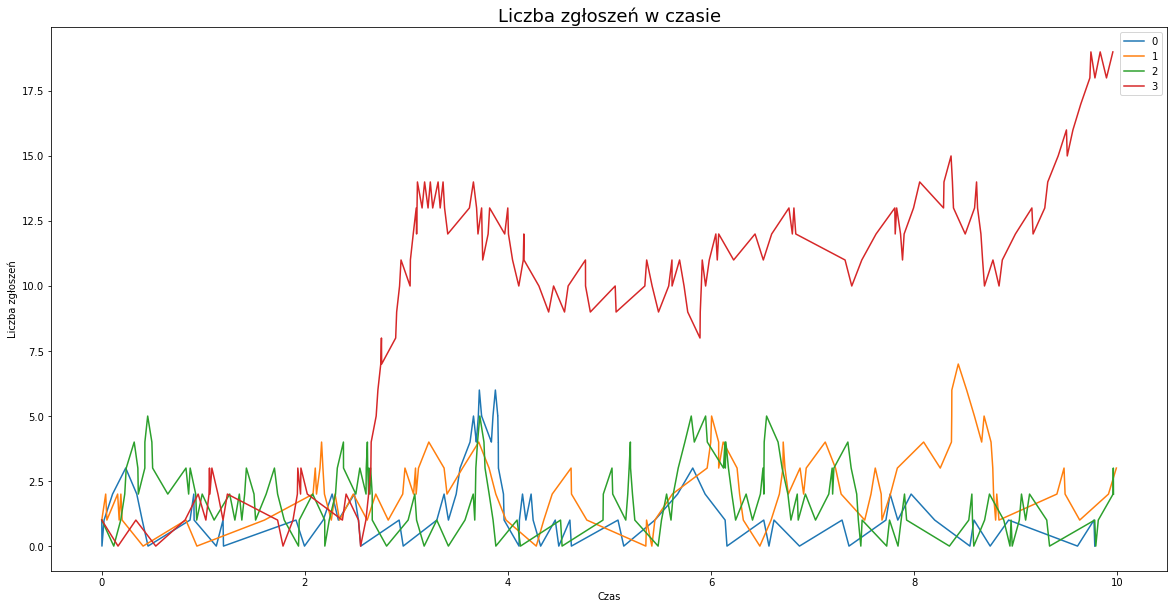

In [6]:
plt.figure(figsize=(20,10))
plt.title("Liczba zgłoszeń w czasie", fontsize=18)
for i in range(os.cpu_count()): 
    d = pd.read_csv(f"../results/process-{i}" + ".csv", delimiter=';')
    plt.plot(d['Time'], d['Customers in system'], label=i)
plt.xlabel("Czas")
plt.legend()
plt.ylabel("Liczba zgłoszeń")

plt.show()

## Wywołanie jednego testu

In [7]:
import time
from Simulator import MMC
from Utils import Utils
from CalcModel import CalcModel


start = time.time()
# service rate | arrival rate | servers | time limit
service_rate = 3
arrival_rate = 5
servers = 2
time_limit = 3

print(f"Ustawienia symulacji: \n Tempo obsługi: {service_rate} \n Tempo napływu: {arrival_rate} \n Liczba serwerów: {servers} \n Limit czasu: {time_limit}")
model = MMC([service_rate,arrival_rate,servers,time_limit])
total, serviced, not_serviced, mean, process = model.run(4)
print(f"Całkowita liczba zgłoszeń: {total}")
print(f"Obsłużone: {serviced}")
print(f"Nie obsłużone: {not_serviced}")
print(f"Średni czas obsługi: {mean}")
end = time.time()
print(f"Czas symulacji: {round(end - start, 4)}")
print("Proces:")
Utils.print_table(process, ["CZAS", "ZDARZENIE", "SERWER", "ZGŁOSZENIE", "LICZBA ZGŁOSZEŃ W SYSTEMIE"])
print("===========")
print("Matematyczny model dla tych ustawień")
print("===========")
model = CalcModel(service_rate,arrival_rate,servers,time_limit)
if model.system_load >= 1:
    print("Brak stanu stacjonarnego")
    print(f"Obiążenie: {model.system_load}")
else:
    print(f"Obciążenie: {model.system_load}")
    print(f"Prawdopodobieństwo wystąpienia 8 zgłoszeń: {model.probability_of_n_customers(8)}")
    print(f"Prawdopodobieństwo opóźnienia: {model.delay_probability()}")
    print(f"Średnia liczba zgłoszeń: {model.average_customers_in_queue()}")
    print(f"Średni czas w systemie = {model.average_time_in_system()}")
    print(f"Średni czas obsługi: {model.mean_service_time}")

Ustawienia symulacji: 
 Tempo obsługi: 3 
 Tempo napływu: 5 
 Liczba serwerów: 2 
 Limit czasu: 3
Całkowita liczba zgłoszeń: 16
Obsłużone: 14
Nie obsłużone: 2
Średni czas obsługi: 0.20761857975509465
Czas symulacji: 0.0184
Proces:
  CZAS  ZDARZENIE      SERWER    ZGŁOSZENIE    LICZBA ZGŁOSZEŃ W SYSTEMIE
------  -----------  --------  ------------  ----------------------------
0       ARRIVAL                           0                             1
0       SERVICE             0             0                             1
0.1651  LEAVE               0             0                             0
0.7056  ARRIVAL                           1                             1
0.7056  SERVICE             1             1                             1
0.7253  ARRIVAL                           2                             2
0.7253  SERVICE             0             2                             2
1.1923  LEAVE               1             1                             1
1.2334  ARRIVAL              

## Analiza Statystyczna

In [8]:
print(f"Liczba wykonanych testów: {len(dataset)}")

Liczba wykonanych testów: 20000


### Przygotwanie danych
Sprawdzenie czy są braki w wartościach (brak stanu stacjonarnego). W przypadku wystąpienia braku, zostaną usunięte puste wiersze. Dodatkowo została dodana kolumna `load` określająca obiążenie jako niskie, średnie i wysokie (`low`, `medium`, `high`), które są w przedziałach odpowiednio, poniżej 0.4, poniżej 0.7 oraz pozostałe.

In [9]:
dataset['load'] = dataset['System load'].apply(lambda q: 'low' if q < 0.4 else 'medium' if q < 0.7 else 'high')

def show_nulls(dataset):
    Sum = dataset.isnull().sum()
    Percentage = (dataset.isnull().sum() / dataset.isnull().count())
    stat = pd.concat([Sum, Percentage], axis=1, keys=['Sum', 'Percentage'])
    print(stat)
    
show_nulls(dataset)

                         Sum  Percentage
Total Customers            0     0.00000
Serviced Customers         0     0.00000
Not Serviced Customers     0     0.00000
Service Mean Time          0     0.00000
Service Rate               0     0.00000
Arrival Rate               0     0.00000
Servers Number             0     0.00000
Time Limit                 0     0.00000
Delay probability       1395     0.06975
System load                0     0.00000
Average Customers       1395     0.06975
Mean Service Time          0     0.00000
Average Time In System  1395     0.06975
load                       0     0.00000


In [10]:
db_prepared = dataset.dropna()
    
show_nulls(db_prepared)

print(f"\nLiczba testów po eliminacji wybrakowanych: {len(db_prepared)}")

                        Sum  Percentage
Total Customers           0         0.0
Serviced Customers        0         0.0
Not Serviced Customers    0         0.0
Service Mean Time         0         0.0
Service Rate              0         0.0
Arrival Rate              0         0.0
Servers Number            0         0.0
Time Limit                0         0.0
Delay probability         0         0.0
System load               0         0.0
Average Customers         0         0.0
Mean Service Time         0         0.0
Average Time In System    0         0.0
load                      0         0.0

Liczba testów po eliminacji wybrakowanych: 18605


### Statystyki

In [11]:
db_prepared.mean()

Total Customers           383.406450
Serviced Customers        380.867509
Not Serviced Customers      2.538941
Service Mean Time           0.218095
Service Rate                5.181560
Arrival Rate                6.928447
Servers Number              4.118678
Time Limit                 55.081967
Delay probability           0.105835
System load                 0.406040
Average Customers           0.719832
Mean Service Time           0.219675
Average Time In System      0.094053
dtype: float64

In [12]:
db_prepared.describe()

Total Customers  Serviced Customers  Not Serviced Customers  \
count      18605.00000        18605.000000            18605.000000   
mean         383.40645          380.867509                2.538941   
std          228.04388          227.469208                5.314395   
min           26.00000           26.000000                0.000000   
25%          193.00000          191.000000                1.000000   
50%          359.00000          357.000000                1.000000   
75%          540.00000          537.000000                3.000000   
max         1065.00000         1056.000000              133.000000   

       Service Mean Time  Service Rate  Arrival Rate  Servers Number  \
count       18605.000000  18605.000000  18605.000000    18605.000000   
mean            0.218095      5.181560      6.928447        4.118678   
std             0.087831      1.677992      1.719940        1.376851   
min             0.087100      2.000200      4.000023        2.000000   
25%             0.150400      3.780160      5.426909        3.000000   
50%             0.189600      5.246312      6.905025        4.000000   
75%             0.263000      6.621294      8.391694        5.000000   
max             0.603500      7.999446      9.999935        6.000000   

         Time Limit  Delay probability   System load  Average Customers  \
count  18605.000000       18605.000000  18605.000000       18605.000000   
mean      55.081967           0.105835      0.406040           0.719832   
std       28.745355           0.122206      0.207910          11.786002   
min       10.000000           0.000017      0.085896           0.000002   
25%       30.000000           0.009272      0.241176           0.003056   
50%       60.000000           0.053793      0.357459           0.031001   
75%       80.000000           0.166054      0.533041           0.188550   
max      100.000000           0.499815      0.999712        1013.047708   

       Mean Service Time  Average Time In System  
count       18605.000000            1.860500e+04  
mean            0.219675            9.405330e-02  
std             0.087793            1.383865e+00  
min             0.125009            3.923402e-07  
25%             0.151028            4.543690e-04  
50%             0.190610            4.542380e-03  
75%             0.264539            2.756164e-02  
max             0.499950            1.143878e+02

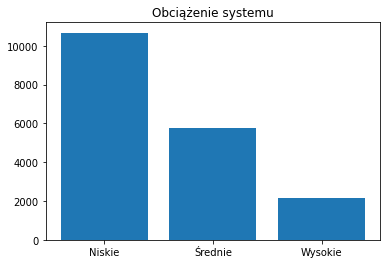

In [13]:
plt.bar(['Niskie', 'Średnie', 'Wysokie'], db_prepared.load.value_counts())
plt.title('Obciążenie systemu')
plt.show()

<BarContainer object of 5 artists>

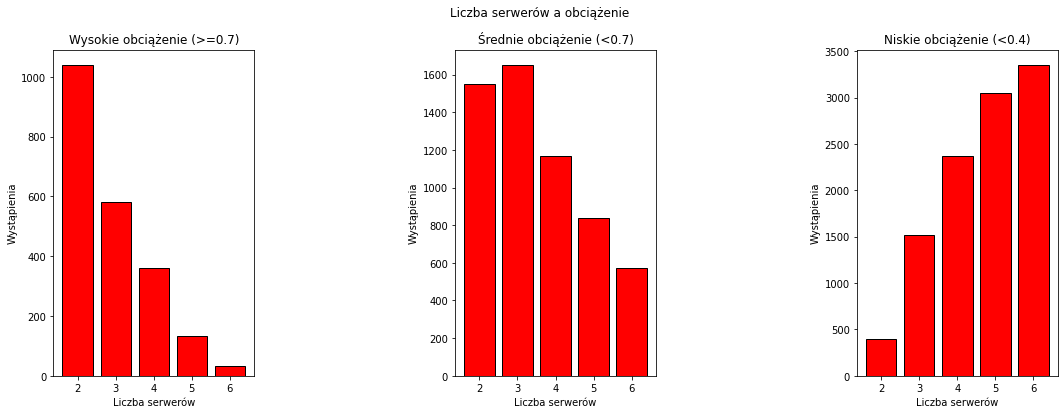

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Liczba serwerów a obciążenie")
fig.subplots_adjust(wspace=1)

ax[0].set_title("Wysokie obciążenie (>=0.7)")
ax[0].set_xlabel("Liczba serwerów")
ax[0].set_ylabel("Wystąpienia")
x = db_prepared['Servers Number'][db_prepared.load == 'high'].value_counts()
x = (list(x.index), list(x.values))
ax[0].bar(x[0], x[1], color='red', edgecolor='black')

ax[1].set_title("Średnie obciążenie (<0.7)")
ax[1].set_xlabel("Liczba serwerów")
ax[1].set_ylabel("Wystąpienia")
x = db_prepared['Servers Number'][db_prepared.load == 'medium'].value_counts()
x = (list(x.index), list(x.values))
ax[1].bar(x[0], x[1], color='red', edgecolor='black')

ax[2].set_title("Niskie obciążenie (<0.4)")
ax[2].set_xlabel("Liczba serwerów")
ax[2].set_ylabel("Wystąpienia")
x = db_prepared['Servers Number'][db_prepared.load == 'low'].value_counts()
x = (list(x.index), list(x.values))
ax[2].bar(x[0], x[1], color='red', edgecolor='black')

### Korelacje
Poniżej mapa oraz wykresy przedstawiające korelacje między zmiennymi.

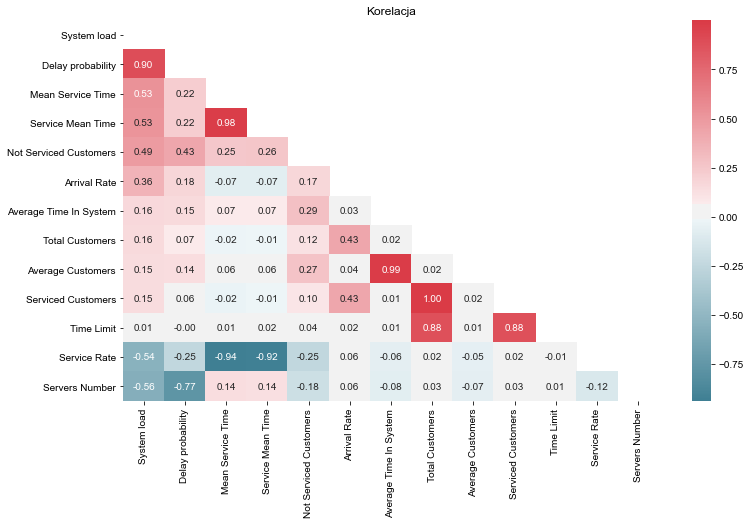

In [15]:
import numpy as np
import seaborn as sns

corr = db_prepared.corr()
top_corr_cols = corr['System load'].sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
drop_self = np.zeros_like(top_corr)
drop_self[np.triu_indices_from(drop_self)] = True
plt.figure(figsize=(12, 7))
plt.title("Korelacja")
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f",
            mask=drop_self)
sns.set(font_scale=1.5)

Z **ustawień systemu** największy wpływ negatywny (mniejsza wartość) na obciążenie systemu ma `Servers Number`, czyli liczba serwerów, natomiast największy wpływ pozytywny ma tempo napływu.

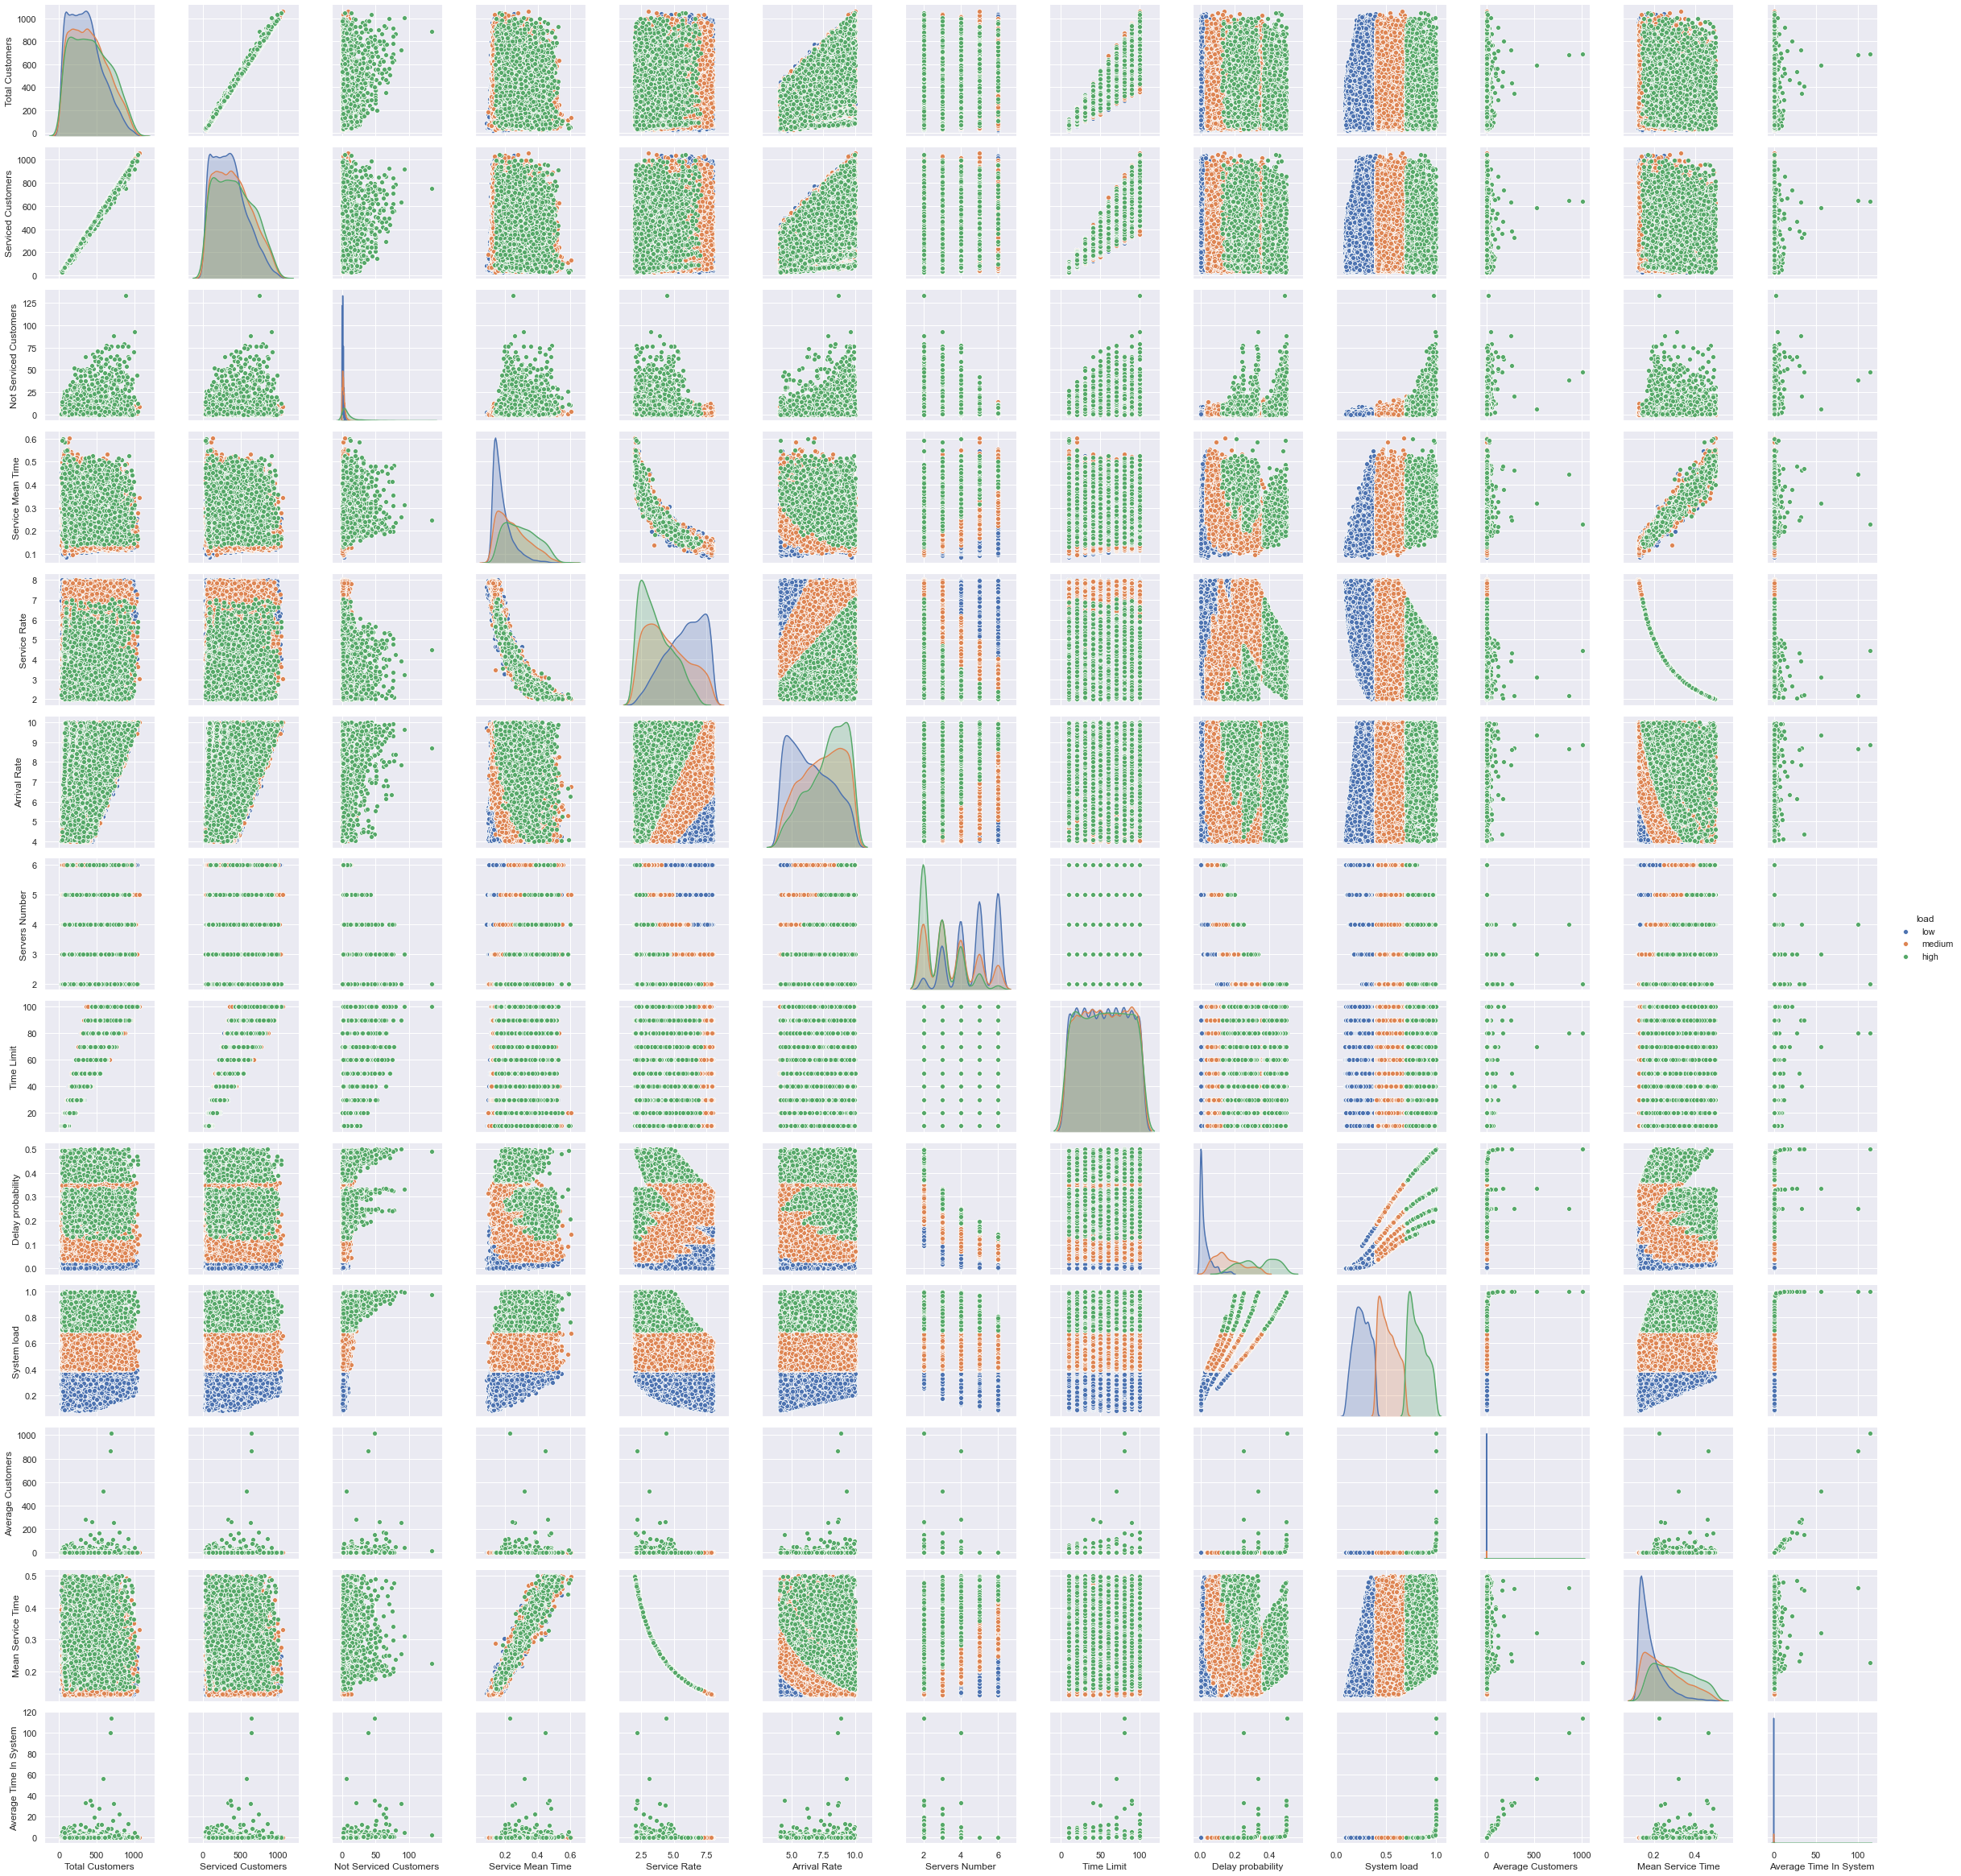

In [16]:
sns.set(font_scale=1.0)
cols = db_prepared.columns
g = sns.pairplot(data=db_prepared.loc[:, cols], hue='load')
fig = g.fig
fig.subplots_adjust(top=0.99, wspace=0.3)
plt.show()

### Obciążenie pry różnym tempie napływu i obsługi oraz liczbie serwerów

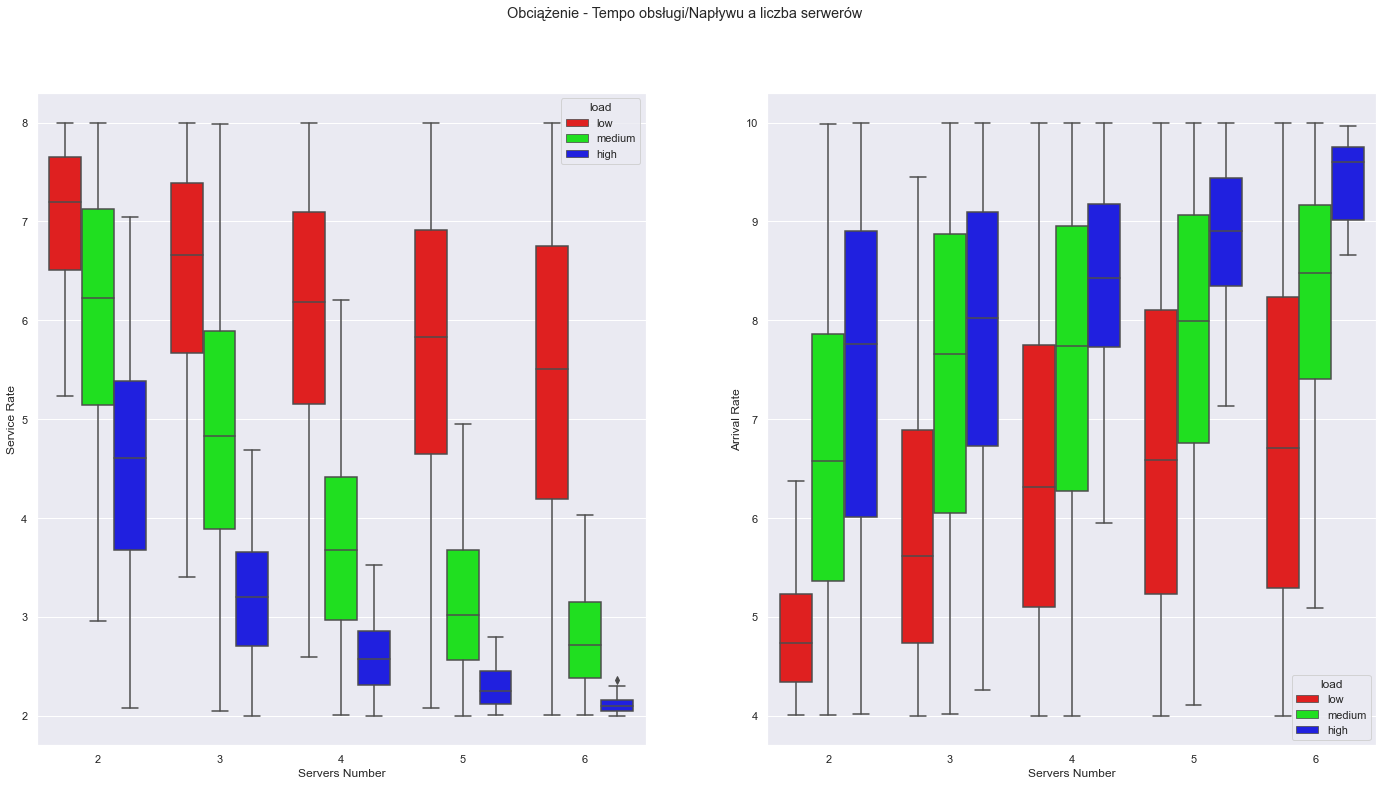

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(24,12))
fig.suptitle("Obciążenie - Tempo obsługi/Napływu a liczba serwerów")
sns.boxplot(y='Service Rate', x='Servers Number', hue='load', data=db_prepared, ax=ax[0],
            palette={'low': "#FF0000", 'medium': "#00FF00", 'high': "#0000FF"})
ax[0].set_ylabel("Service Rate")
ax[0].set_xlabel("Servers Number")
sns.boxplot(y='Arrival Rate', x='Servers Number', hue='load', data=db_prepared, ax=ax[1],
            palette={'low': "#FF0000", 'medium': "#00FF00", 'high': "#0000FF"})
ax[1].set_ylabel("Arrival Rate")
ax[1].set_xlabel("Servers Number")
plt.show()

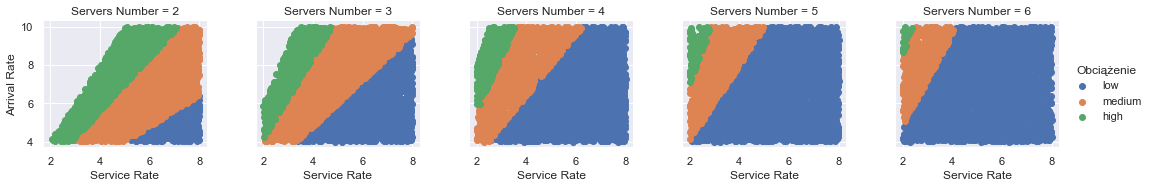

In [18]:
g = sns.FacetGrid(db_prepared, col='Servers Number', hue='load',
                  col_order=[i for i in range(2,7)], hue_order=['low', 'medium', 'high'])
g.map(plt.scatter, 'Service Rate', 'Arrival Rate')
fig = g.fig
fig.subplots_adjust(wspace=0.3, top=0.8)
fig.suptitle("")
g.add_legend(title='Obciążenie')

plt.show()

Jak widać na powyższych wykresach, im więcej serwerów tym więcej symulacji o niskim obciążeniu. Wyższe tempo napływu i niskie tempo obsługi to więszke obciążenie systemu.

### Różnica między modelem matematycznym a wynikiem symulacji - średni czas obłsugi

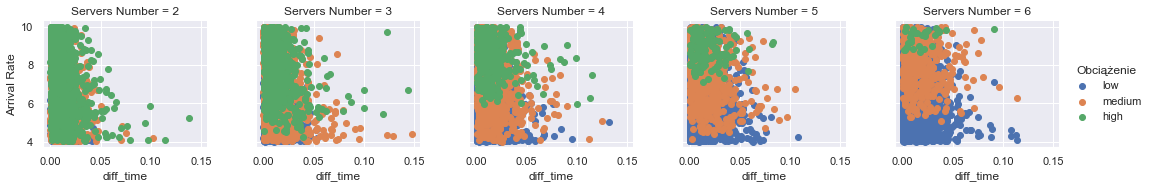

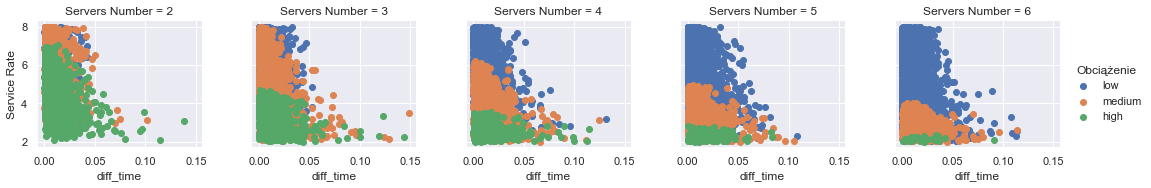

In [19]:
df = db_prepared.copy()
df['diff_time'] = abs(db_prepared['Service Mean Time'] - db_prepared['Mean Service Time'])
df['serviced_percent'] = (db_prepared['Serviced Customers'] / db_prepared['Total Customers']) * 100

g = sns.FacetGrid(df, col='Servers Number', hue='load',
                  col_order=[i for i in range(2,7)], hue_order=['low', 'medium', 'high'])
g.map(plt.scatter, 'diff_time', 'Arrival Rate')
fig = g.fig
fig.subplots_adjust(wspace=0.3, top=0.8)
fig.suptitle("")
g.add_legend(title='Obciążenie')

g = sns.FacetGrid(df, col='Servers Number', hue='load',
                  col_order=[i for i in range(2,7)], hue_order=['low', 'medium', 'high'])
g.map(plt.scatter, 'diff_time', 'Service Rate')
fig = g.fig
fig.subplots_adjust(wspace=0.3, top=0.8)
fig.suptitle("")
g.add_legend(title='Obciążenie')



### Średni czas obsługi z symulacji i modelu

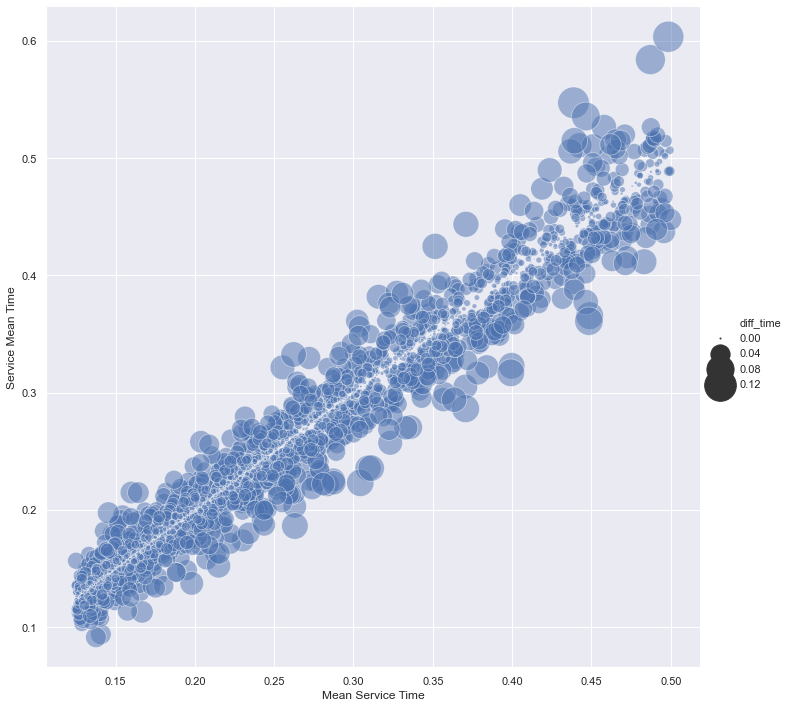

In [20]:
sns.relplot(x="Mean Service Time", y="Service Mean Time", size="diff_time",
            sizes=(1, 1000), alpha=.5,
            height=10, data=df.loc[df['Servers Number'] == 5])

### Różnica w procentowej wartości obsłużonych zgłoszeń

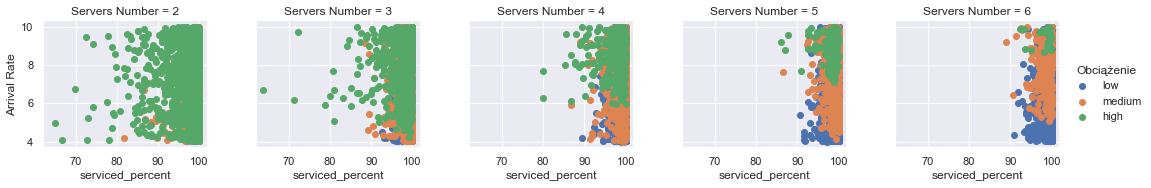

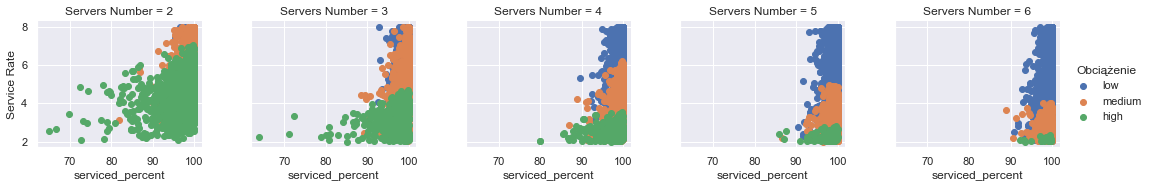

In [21]:
g = sns.FacetGrid(df, col='Servers Number', hue='load',
                  col_order=[i for i in range(2,7)], hue_order=['low', 'medium', 'high'])
g.map(plt.scatter, 'serviced_percent', 'Arrival Rate')
fig = g.fig
fig.subplots_adjust(wspace=0.3, top=0.8)
fig.suptitle("")
g.add_legend(title='Obciążenie')

g = sns.FacetGrid(df, col='Servers Number', hue='load',
                  col_order=[i for i in range(2,7)], hue_order=['low', 'medium', 'high'])
g.map(plt.scatter, 'serviced_percent', 'Service Rate')
fig = g.fig
fig.subplots_adjust(wspace=0.3, top=0.8)
fig.suptitle("")
g.add_legend(title='Obciążenie')

## Regresja
Do kolejnych wykresów wykorzystano dla czytelności wykorzystano dane dla jednej lilczby serwerów.
### Tempo napływu i obsługi przy różnych obciążeniach

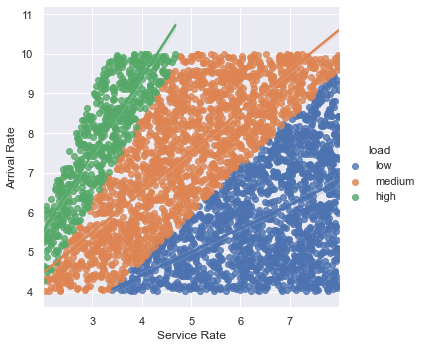

In [22]:
g = sns.lmplot(x='Service Rate', y='Arrival Rate', hue='load', data=db_prepared.loc[db_prepared['Servers Number'] == 3])

### Wpływ tempa napływu na obciążenie systemu

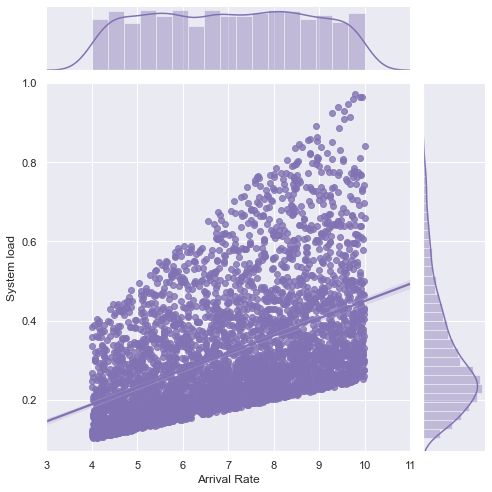

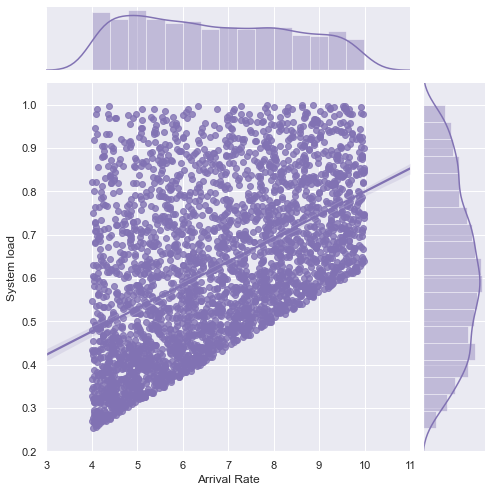

In [23]:
g = sns.jointplot("Arrival Rate", "System load", data=df.loc[df['Servers Number'] == 5],
                  kind="reg", truncate=False,
                  xlim=(3, 11), ylim=(0.07, 1),
                  color="m", height=7)
g = sns.jointplot("Arrival Rate", "System load", data=df.loc[df['Servers Number'] == 2],
                  kind="reg", truncate=False,
                  xlim=(3, 11), ylim=(0.2, 1.05),
                  color="m", height=7)

### Wpływ tempa obsługi na obciążenie systemu

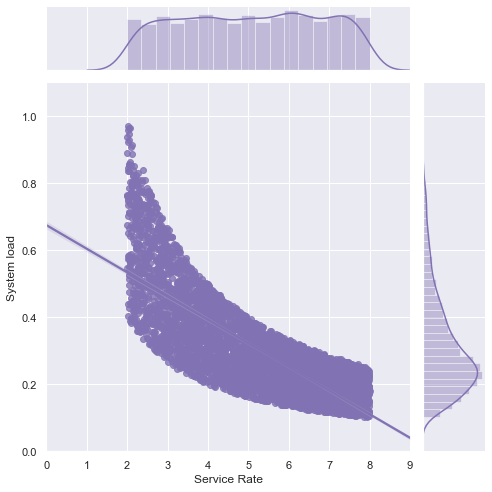

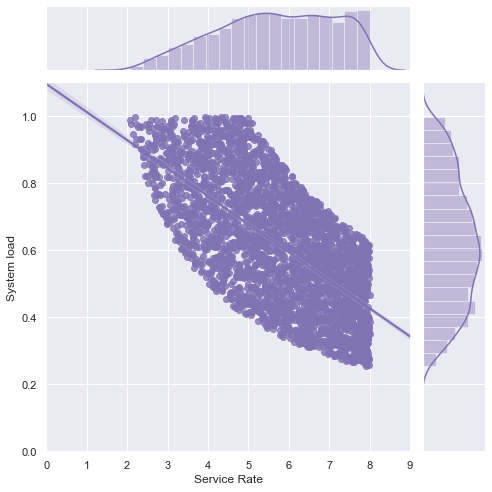

In [24]:
g = sns.jointplot("Service Rate", "System load", data=df.loc[df['Servers Number'] == 5],
                  kind="reg", truncate=False,
                  xlim=(0, 9), ylim=(0, 1.1),
                  color="m", height=7)
g = sns.jointplot("Service Rate", "System load", data=df.loc[df['Servers Number'] == 2],
                  kind="reg", truncate=False,
                  xlim=(0, 9), ylim=(0, 1.1),
                  color="m", height=7)

### Wpływ tempa obsługi/napływu na procentową wartość obsłużonych zgłoszeń

Tempo obsługi - procent obsłużonych przy 5 serwerach


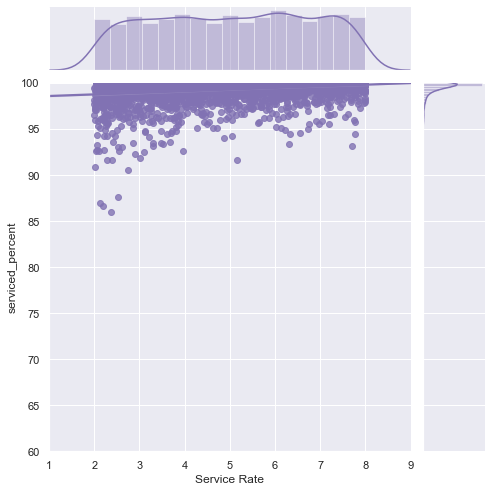

Tempo obsługi - procent obsłużonych przy 2 serwerach


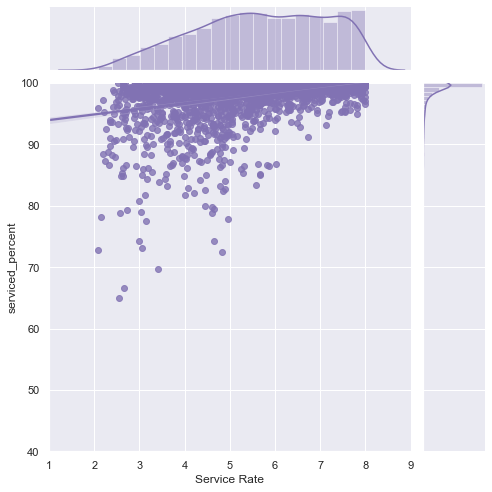

Tempo napływu - procent obsłużonych przy 5 serwerach


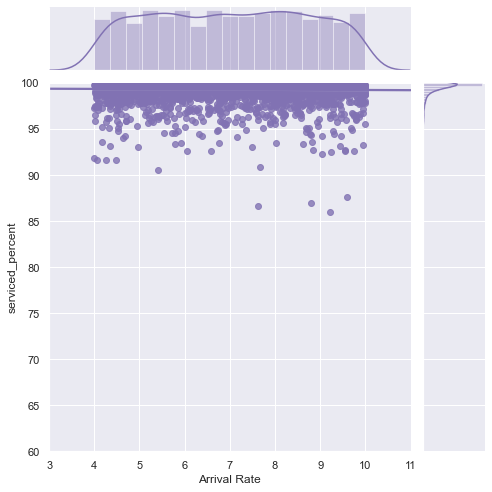

Tempo napływu - procent obsłużonych przy 2 serwerach


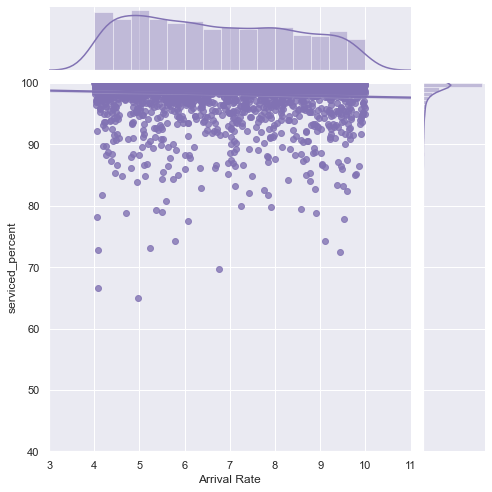

In [25]:
print("Tempo obsługi - procent obsłużonych przy 5 serwerach")
g = sns.jointplot("Service Rate", "serviced_percent", data=df.loc[df['Servers Number'] == 5],
                  kind="reg", truncate=False,
                  xlim=(1, 9), ylim=(60, 100),
                  color="m", height=7)
plt.show()
print("Tempo obsługi - procent obsłużonych przy 2 serwerach")
g = sns.jointplot("Service Rate", "serviced_percent", data=df.loc[df['Servers Number'] == 2],
                  kind="reg", truncate=False,
                  xlim=(1, 9), ylim=(40, 100),
                  color="m", height=7)
plt.show()
print("Tempo napływu - procent obsłużonych przy 5 serwerach")
g = sns.jointplot("Arrival Rate", "serviced_percent", data=df.loc[df['Servers Number'] == 5],
                  kind="reg", truncate=False,
                  xlim=(3, 11), ylim=(60, 100),
                  color="m", height=7)
plt.show()
print("Tempo napływu - procent obsłużonych przy 2 serwerach")
g = sns.jointplot("Arrival Rate", "serviced_percent", data=df.loc[df['Servers Number'] == 2],
                  kind="reg", truncate=False,
                  xlim=(3, 11), ylim=(40, 100),
                  color="m", height=7)
plt.show()

### Tempo napływu i obsługi a różnice między modelem matematycznym

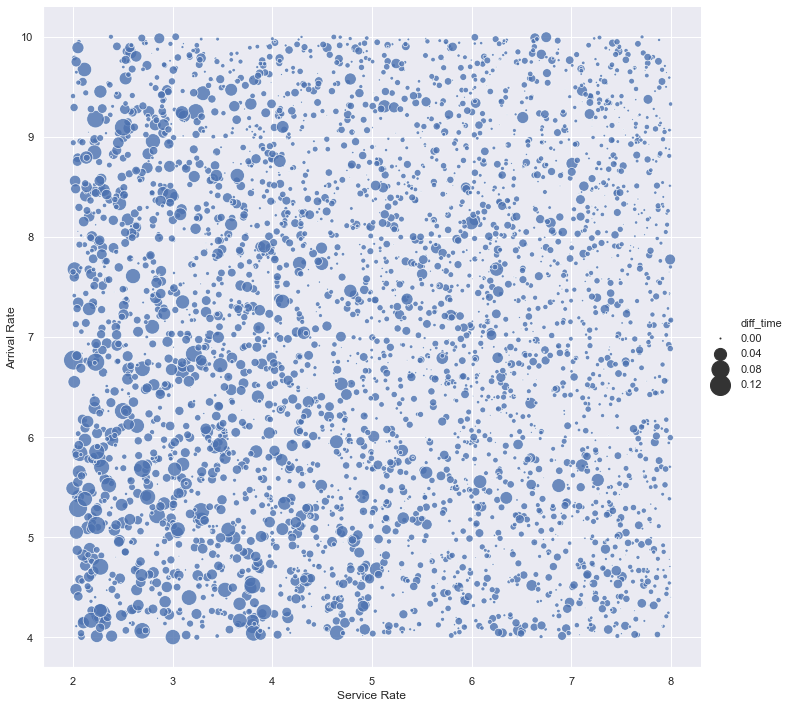

In [26]:
sns.relplot(x="Service Rate", y="Arrival Rate", size="diff_time",
            sizes=(1, 400), alpha=.8,
            height=10, data=df.loc[df['Servers Number'] == 5])

### Współczynnik regresji
Współczynnik regresji zmiennych tempa napływu, tempa obsługi, liczby serwerów do obciążenia systemu.

In [27]:
from sklearn import linear_model
X = df[['Service Rate', 'Arrival Rate', 'Servers Number']]
Y = df['System load']
regr = linear_model.LinearRegression()
regr.fit(X,Y)
print(f"Współczynnik regresji dla kolejno: tempa obsługi, tempa napływu, liczby serwerów: {regr.coef_} do obciążenia systemu")
print(f"Współczynnik dopasowania R^2: {regr.score(X,Y)}")

Współczynnik regresji dla kolejno: tempa obsługi, tempa napływu, liczby serwerów: [-0.07976336  0.05290107 -0.10056009] do obciążenia systemu
Współczynnik dopasowania R^2: 0.8779461663377303


In [28]:
from sklearn import linear_model
X = df[['Service Rate', 'Arrival Rate', 'Servers Number']]
Y = df['serviced_percent']
regr = linear_model.LinearRegression()
regr.fit(X,Y)
print(f"Współczynnik regresji dla kolejno: tempa obsługi, tempa napływu, liczby serwerów: {regr.coef_} do % wartości obsłużonych")
print(f"Współczynnik dopasowania R^2: {regr.score(X,Y)}")

Współczynnik regresji dla kolejno: tempa obsługi, tempa napływu, liczby serwerów: [ 0.32813395 -0.07375355  0.29174878] do % wartości obsłużonych
Współczynnik dopasowania R^2: 0.11296677131797084


### Regresja podsumowanie
Wyniki z powyższych obliczeń oraz wykresów przedstawiają modele regresji liniowej, które przedstawiają wpływy tempa obsługi, tempa napływu, liczby serwerów na obciążenie systemu oraz procentowe wartości obsłużonych klientów.

Wzrost tempa napływu powoduje zwiększenie obciążenia systemu.
Wzrost tempa obsługi powoduje zmniejszenie obciążenia systemu.
Więcej serwerów to mniejsze obciążenie systemu.

Tempo obsługi ma większy wpływ na obciążenie niż tempo napływu.

Współczynnik dopasowania regresji dla tempa obsługi, napływu, liczby serwerów do obciążenia systemu jest wysoki, wynosi 0.8779461663377303.

Wzorst tempa obsługi oraz liczby serwerów zwiększa wartość procentową liczby obsłużonych. Współczynnik dopasowania tutaj jest niski, wynosi 0.11296677131797084.

## Testy Statystyczne
### Test Średnich
Hipoteza:

H0: średnia dla średnich czasów obsługi jest taka sama przy 2 jak i 4 serwerach.

H1: różne średnie dla średnich czasów obsługi.



In [29]:
from scipy.stats import ttest_ind

data1 = df.loc[df['Servers Number'] == 2]
data2 = df.loc[df['Servers Number'] == 4]
s = min(len(data1), len(data2))
data1 = data1[:s]
data1 = data1['Service Mean Time']
data2 = data2[:s]
data2 = data2['Service Mean Time']
stat, p = ttest_ind(data1, data2)
if p > 0.05:
	print('Brak podstaw do odrzucenia hipotezy')
else:
	print('Mamy podstawę do odrzucenia hipotezy H0 na rzecz H1')
    
print(f"Średnia średnich czasów obsługi przy 2 serwerach : {data1.mean()}")
print(f"Średnia średnich czasów obsługi przy 4 serwerach : {data2.mean()}")

1.805573958894935e-66
Mamy podstawę do odrzucenia hipotezy H0 na rzecz H1
Średnia średnich czasów obsługi przy 2 serwerach : 0.1902169735520589
Średnia średnich czasów obsługi przy 4 serwerach : 0.22559142952795447


### Test Średnich
Hipoteza

H0: średnia dla średnich czasów obsługi jest taka sama przy 4, 5 jak i 6 serwerach.

H1: różne średnie dla średnich czasów obsługi.

In [30]:
from scipy.stats import f_oneway

data1 = df.loc[df['Servers Number'] == 4]
data2 = df.loc[df['Servers Number'] == 5]
data3 = df.loc[df['Servers Number'] == 6]

s = min(len(data1), min(len(data2), len(data3)))
data1 = data1['Service Mean Time']
data2 = data2['Service Mean Time']
data3 = data3['Service Mean Time']

stat, p = f_oneway(data1, data2, data3)
if p > 0.05:
	print('Brak podstaw do odrzucenia hipotezy')
else:
	print('Mamy podstawę do odrzucenia hipotezy H0 na rzecz H1')

print(f"Średnia średnich czasów obsługi przy 4 serwerach : {data1.mean()}")
print(f"Średnia średnich czasów obsługi przy 5 serwerach : {data2.mean()}")
print(f"Średnia średnich czasów obsługi przy 6 serwerach : {data3.mean()}")

Brak podstaw do odrzucenia hipotezy
Średnia średnich czasów obsługi przy 4 serwerach : 0.22608552766393442
Średnia średnich czasów obsługi przy 5 serwerach : 0.22647578475336322
Średnia średnich czasów obsługi przy 6 serwerach : 0.22863367037411525


### Test Średnich symulacji i obliczeń
Hipoteza:
    
H0: średnia dla średnich czasów obsługi jest taka sama dla danych z symulajci i teoretycznych danych.

H1: średnie są różne

In [33]:
from scipy.stats import ttest_ind

data1 = df['Service Mean Time']
data2 = df['Mean Service Time']

stat, p = ttest_ind(data1, data2)
if p > 0.05:
    print("Brak podstaw do odrzucenia hipotezy")
else:
    print("Mamy podstawę do odrzucenia hipotezy H0 na rzecz H1")
print(f"Średnia średnich czasów obsługi z symulacji to: {data1.mean()}")
print(f"Teoretyczna średnia średnich czasów obsługi to: {data2.mean()}")

Brak podstaw do odrzucenia hipotezy
Średnia średnich czasów obsługi z symulacji to: 0.21809490459553882
Teoretyczna średnia średnich czasów obsługi to: 0.21967502978541376
